## Movie Analysis

##### In this notebook you will learn:
1. Getting and Cleaning the Data
2. Getting the overall figures and having a basic understanding
3. Joining datasets, aggregating and filtering by conditions
4. Drilling down into the insights to discover patterns
5. Creating summary tables

all using Python <a href="https://pandas.pydata.org/docs/getting_started/index.html#getting-started" target="_blank">`pandas`</a>  and <a href="https://matplotlib.org/3.2.2/contents.html" target="_blank">`matplotlib`</a> libraries. You can download and run this Jupyter Notebook **here**.

## Introduction

<p>Movie Tweetings Project lives on <a href="https://github.com/sidooms/MovieTweetings" target="_blank">GitHub</a> and its story is quite straight forward in a nutshell: </p>

It consists of ratings on movies that were contained in well-structured tweets on Twitter and it has been updated every day since 2013. OK but, how is this data created?

The source is the people who connected their `IMDB` profile with their `Twitter` accounts. Whenever they rate a movie on the website an automated process will shoot a twit. 

And these *well-structured* tweets are like: "I rated The Matrix 9/10 http://www.imdb.com/title/tt0133093/ #IMDb"

Nice but, can we use this data to learn and practice some data analysis using Python? The answer is yes! 

We highly encourage you to replicate the work and find some additional knowledge hidden inside. You can either download the data from the original repo or from <a href="https://drive.google.com/drive/folders/1nSV5S8jCh7LbrTdIgOSyxq6DqN-G3bah?usp=sharing" target="_blank">here</a>. Note that you will have the most up to date data if you use the original repo.

The most important is to have these 3 files in a folder called `data` inside your working directory as a first step:

- users.dat 
- movies.dat 
- ratings.dat

The first action you would take is to check what these files contain:

In [1]:
%%bash 
head -n3 data/users.dat

1::139564917
2::522540374
3::475571186


In `users.dat` the first field is the `user_id` and the second one is `twitter_id`. Interestingly, the separator is not a comma but a double colon. This means that they decided to use a double colon as a separator.

In [2]:
%%bash 
head -n3 data/movies.dat

0000008::Edison Kinetoscopic Record of a Sneeze (1894)::Documentary|Short
0000010::La sortie des usines Lumière (1895)::Documentary|Short
0000012::The Arrival of a Train (1896)::Documentary|Short


Here we have the `movie_id`, `movie_title` and `genres`. The `genres` are separated by `|`, another interesting expression!

In [3]:
%%bash 
head -n3 data/ratings.dat

1::0114508::8::1381006850
2::0102926::9::1590148016
2::0208092::5::1586466072


In this third dataset, our variables are `user_id`, `movie_id`, `rating` and, `rating_timestamp`. And again it comes with an intersting feature: The timestamps are in <a href="https://www.unixtimestamp.com/" target="_blank">unixtime</a> format! <p>
    
Now you have an overall understanding of how the raw datasets look like. Next, you will import the libraries you will need for the rest of this work:

In [4]:
import warnings

import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

Options You have used above:
- You give the `filter-out-warnings` command to have a cleaner notebook without warning messages. 
- Set the max rows and max columns to some big numbers (in this case **50**). This option just makes all the columns and rows in a DataFrame more readable or visible.
- `fivethirtyeight` style to have plots like the ones on <a href="https://www.fivethirtyeight.com" target="_blank">fivethirtyeight.com</a>: A website founded by <a href="https://en.wikipedia.org/wiki/Nate_Silver" target="_blank">Nate Silver</a>. If you want to explore `fivethirtyeight` I highly recommend the book: <a href="https://www.amazon.com/Signal-Noise-Many-Predictions-Fail-but/dp/0143125087" target="_blank">The Signal and the Noise</a>.

## Reading the Data:

You are ready to read the files into `pandas` data frames now:
- You will set the separators to be double colons `::`
- You will give the column names when reading and they will become the headers
- You will convert the Unixtime to a datetime format

### 1- Users

In [5]:
users = pd.read_csv('data/users.dat', sep='::', 
                    names=['user_id', 'twitter_id'])

In [6]:
users.head()

,user_id,twitter_id
0,1,139564917
1,2,522540374
2,3,475571186
3,4,215022153
4,5,349681331


### 2- Ratings

In [7]:
ratings = pd.read_csv('data/ratings.dat', sep='::',
                      names=['user_id', 'movie_id', 'rating', 'rating_timestamp']
                      ).sort_values("rating_timestamp") # sorting the dataframe by datetime

Convert the rating timestamps to datetime format:

In [8]:
ratings["rating_timestamp"] = pd.to_datetime(ratings["rating_timestamp"], unit='s')

In [9]:
ratings.head()

,user_id,movie_id,rating,rating_timestamp
138461,11080,2171847,6,2013-02-28 14:38:27
585269,45890,444778,8,2013-02-28 14:43:44
611517,47821,1411238,6,2013-02-28 14:47:18
648464,50454,1496422,7,2013-02-28 14:58:23
742847,58297,118799,5,2013-02-28 15:00:53


### 3- Movies

In [10]:
movies = pd.read_csv('data/movies.dat', sep='::', 
                     header=None, names=['movie_id', 'movie_title', 'genres']);

In [11]:
movies.head()

,movie_id,movie_title,genres
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


## A quick look into the datasets:

By far the most important variable is the movie `rating`. Let's see its distribution:

In [12]:
ratings['rating'].value_counts()

8     211699
7     196410
9     124459
6     114372
10    103648
5      65907
4      26940
3      14759
1      10324
2       8778
0        267
Name: rating, dtype: int64

`value_counts()` is a quick but effective way of checking what values your variable takes. Here we see quickly that 8 rating score was given 211699 times!

A histogram is also quite helpful or the `describe()` function:

In [13]:
ratings['rating'].describe()

count    877563.000000
mean          7.316577
std           1.853619
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

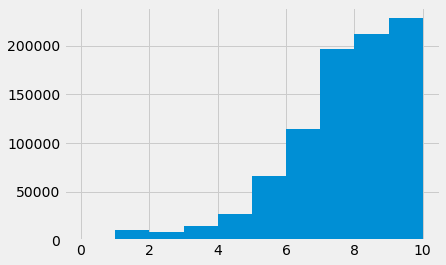

In [14]:
ratings['rating'].hist(bins=10);

It is skewed to the left!

The `hist()` and `describe()` functions are in fact quite similar: One gives text output and the other gives the visual. <p> 
Hence, we could say that the `rating` was left-skewed without seeing the visual histogram also. Because in the `describe()` output: 
* The `mean` is much smaller than the `median` (50%) and 
* 25% of the data covers only until a rating of **6**

This is a bit confusing now. You have seen first that the highest frequency was 8. And then after generating the historgram it looked like 9-10. It is because of binning! 

Playing with the `bins` of a histogram can have an impact on the story you are telling. The same histogram would look like this if you increase the number of bins from 10 to 30:

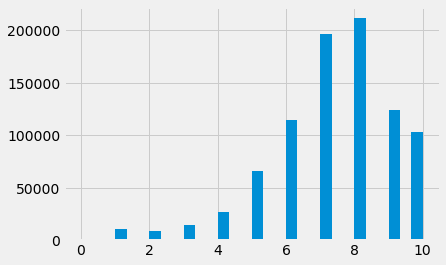

In [15]:
ratings['rating'].hist(bins=30);

If you were using the first histogram you would falsely argue that the most frequent rating was 9 or maybe 10. However, the second one makes everything crystal clear. Also, note that if you use the `value_counts()` function you wouldn't also fall into that trap.

How many unique `user_id` do we have in the `users` data?

In [16]:
f"We have {len(users.user_id.unique())} unique user ids in the data"

'We have 68388 unique user ids in the data'

We have just seen that both `value_counts()` and `describe()` are quite handy. So why not combine them? <p>
For instance, how many rating twits are posted by the users on average?

In [17]:
# Notice that this time I am accessing the column by dot notation

ratings.user_id.value_counts().describe()

count    68388.000000
mean        12.832120
std         46.009589
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       2875.000000
Name: user_id, dtype: float64

This time our data is skewed to the right. Notice how the `mean` is much greater than the `median` (50%)

This skewness is at the extreme: Look how the `max` value is far far away! Could there be someone posting more than 2000 times? Not likely.

The output also tells us that **%50** of the people used it only **twice** but, the average is almost **13**. It is because of those users with extreme usage numbers. Could it be possible that they are not human beings but just bots? It could be a great topic to investigate. However, we will continue by joining these datasets now.

### Joining the Datasets

![title](tweet_pandas.png)

Luckily we have a user friendly interface to <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html" target="_blank">join</a>  our `movies` data frame with the `ratings` and this is going to be an *inner* join. It means that we are bringing in the movies only if there is a rating available for them: 

In [18]:
movies_rating = (ratings
                  .set_index("movie_id")
                  .join(movies.set_index("movie_id"), 
                        how="left")
                 )

movies_rating.head(2)

,user_id,rating,rating_timestamp,movie_title,genres
movie_id,,,,,
8,41412,5,2014-04-08 18:20:11,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
10,68190,10,2014-10-09 18:15:53,La sortie des usines Lumière (1895),Documentary|Short


Notice that you didn't use the `on` and `how` parameters when you are joining because you set index of both data frames to `movie_id`. So, the `join` knew on which variable to join and by default it became an *inner* join.

Looking at the output of the `join` operation, you have a new problem: You want to quantify the `genres`. How would you count them? <p>
One way of doing that could be creating dummies for each possible `genre` such as `Sci-Fi` or `Drama`. <p> and having a single column for each. <p>
Creating dummies stands for having 0s and 1s just like here:

In [19]:
dummies = movies_rating['genres'].str.get_dummies()
dummies.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


You can concatenate these `dummies` to the original `movies_rating` data frame:

In [20]:
tidy_movie_ratings = (pd.concat([movies_rating, dummies], axis=1)
                       .drop(["rating_timestamp", "genres"], axis=1)
                )

tidy_movie_ratings.head()

,user_id,rating,movie_title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,41412,5,Edison Kinetoscopic Record of a Sneeze (1894),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,68190,10,La sortie des usines Lumière (1895),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12,67178,10,The Arrival of a Train (1896),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25,36321,8,The Oxford and Cambridge University Boat Race ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91,5608,6,Le manoir du diable (1896),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


This is almost as tidy as you want but, it would be much more clean and useful if you could get those production years in a separate column. It would allow you to compare film productions over the years. Next, you will practice the `str` method which is quite popular and a lifesaver in many cases. <p>
    
You will:
- Make a new column by getting the 4 digits representing the year:
- Remove the last 7 characters from the movie names

In [21]:
tidy_movie_ratings["production_year"] = tidy_movie_ratings["movie_title"].str[-5:-1] #.astype(int)
tidy_movie_ratings["movie_title"] = tidy_movie_ratings["movie_title"].str[:-7]

In [22]:
# check that out
tidy_movie_ratings.reset_index(inplace=True)

tidy_movie_ratings.head(2)

,movie_id,user_id,rating,movie_title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,production_year
0,8,41412,5,Edison Kinetoscopic Record of a Sneeze,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1894
1,10,68190,10,La sortie des usines Lumière,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1895


**Congratulation.** You have completed the most difficult part: Getting and cleaning the data! <p> This was not easy. You are special if you could follow until here. You can now: <a href="https://www.youtube.com/watch?v=2wnOpDWSbyw" target="_blank">watch the first movie in our records from 1894</a> as a reward :)

**Next, you are going to visualize your data and discover some patterns**
Generally this part is more interesting for the larger audience and takes more attention when you deliver your report.

## Visualizing the Patterns

Let's start with total volume of films over the years

You will count the total number of productions for each year and plot it. The record you see for the year of 2021 should be filtered out for sure before proceeding.

In [23]:
condition = tidy_movie_ratings["production_year"].astype(int) < 2021

prodcount = (tidy_movie_ratings[condition][["production_year", "movie_id"]]
             .groupby("production_year")
             .count()
            )

prodcount.tail()

,movie_id
production_year,
2016,80425
2017,62035
2018,43694
2019,50044
2020,5712


The other interesting number is 2020. Although we have passed more than half of the year there are only 5712 rated films and movies. 2020 is definitely one of the most extraordinary years in history. Or they are so new, the people didn't have the time to watch them yet.

You can chart a 5 year moving average of the total productions:

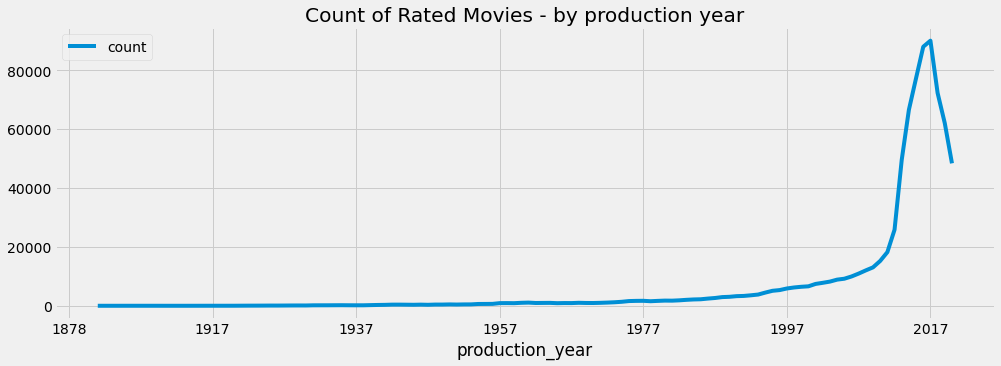

In [24]:
(prodcount
 .rolling(5).mean().rename(columns={"movie_id":"count"})
 .plot(figsize=(15,5), 
       title="Count of Rated Movies - by production year")
);

We see that the 5-year moving average is in a shocking decline already. What is happening here? What can be the reason? Can we formulate some hypotheses? Here are some points for you to consider:

- This was an *inner* join. So these are the **rated movies**. Perhaps site and app usage went down.
- The filming industry is in a serious crisis! They are not producing films because of COVID-19.
- The people didn't have the time to watch the most recent movies. If they didn't watch, they don't rate and we can see a decline. For example, I didn't watch the Avengers series before doing this analysis and on the other hand, The Braveheart (1995) most probably had enough time to get high numbers.

##### What have the people watched (or rated) most of the time since 2000?

Let's now focus on the `genres` with high volume. You are going to identify the top 6 genres with the highest volume and filter them to produce the next chart.

In [25]:
# top 6 genre by the total number of movies
top6_genre = (tidy_movie_ratings.iloc[:, 4:-1] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(6) # get the first 6
              .index.values # get the genre names
              )

top6_genre

array(['Drama', 'Thriller', 'Action', 'Comedy', 'Adventure', 'Sci-Fi'],
      dtype=object)

In [26]:
genre_groups = (tidy_movie_ratings.iloc[:, 4:] 
                .groupby("production_year")
                .sum()
               ).loc["2000":"2019", top6_genre] # since 2000

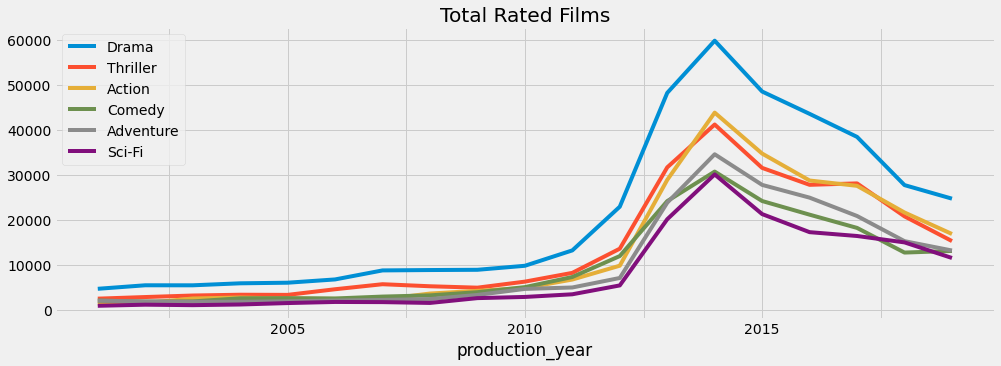

In [27]:
(genre_groups.rolling(2).mean() # a 2 year moving average of total volume
 .plot(figsize=(15,5), 
       title="Total Rated Films"));

#### `Drama` and `Thriller` are the winners
  * This plot would show the `Sci-Fi` & `Adventure` not as important.
  * On the other hand, some patterns can be misleading since we are only looking at the absolute numbers.
  * Another way to look at this phenomenon is using the percentage changes.
  * This could help decision-taking if we are _( let's say )_ in the business of online movie streaming

In [28]:
percent_change = (tidy_movie_ratings.iloc[:, 4:]
                    .groupby("production_year")
                    .sum()
                    .pct_change(periods=2) # 2 years percent change of the volume
                   ).loc["2000":"2019", top6_genre]

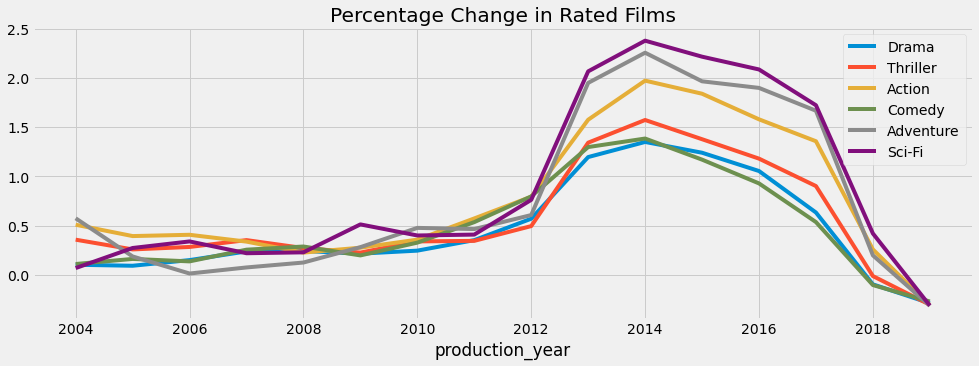

In [29]:
(percent_change.rolling(5).mean() # 5 years moving average
 .plot(figsize=(15,5), 
       title="Percentage Change in Rated Films"));

We notice the decline we have spotted one more time. What's interesting is to see the `Sci-Fi` & `Adventure` moving to the top.
- Indeed, the `Sci-Fi` & `Adventure` was a real **hype** and you might play your card into them, especially if your business is somewhat related to the global filming industry trends. It has the sharpest slope for the increase in getting ratings. This can signal for the increasing demand.

### Top Rated Sci-Fi Movies by Decades

What are the movies from each decade which you could suggest to the users by default? _( let's say for your imaginary streaming service )_

- decade: by production year
- metric: average rating
- movies having more than 10 ratings

As a first step you are going to generate a science fiction base table

In [30]:
cols = ["movie_title", "rating", "production_year", "Sci-Fi", "movie_id"]
condition0 = tidy_movie_ratings["production_year"].astype(int) < 2020
condition1 = tidy_movie_ratings["Sci-Fi"] == 1

scifi = (tidy_movie_ratings
         [cols]
         [condition0 & condition1]
         .drop("Sci-Fi", axis=1)
        )

scifi["decade"] = scifi['production_year'].astype(int)//10*10

scifi.head()

,movie_title,rating,production_year,movie_id,decade
8,A Trip to the Moon,7,1902,417,1900
9,A Trip to the Moon,10,1902,417,1900
10,A Trip to the Moon,8,1902,417,1900
11,A Trip to the Moon,8,1902,417,1900
12,A Trip to the Moon,10,1902,417,1900


And then you will create a count group which will tell you how many times a movie was rated. Because you need to filter out the ones rated less than or equal to 10 times:

In [31]:
count_group = scifi.groupby("movie_id").count()["rating"]

movie_list = count_group[count_group > 10].index.values
movie_list[:5]

array([  417, 17136, 21884, 24184, 24216])

Now `movie_list` contains those movies rated more than 10 times. Next you will do the filtering:

In [32]:
condition = scifi["movie_id"].isin(movie_list)
columns = ["movie_title", "decade", "rating"]

scifi_filtered = scifi[condition][columns]

In [33]:
top_rate_by_decade = (scifi_filtered
                     .groupby(["decade", "movie_title"])
                     .mean()
                     .sort_values(["decade", "rating"], 
                                                ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    ).round(2)

top_rate_by_decade

rating
decade movie_title                                               
1900   A Trip to the Moon                                    8.48
1920   Metropolis                                            8.73
1930   King Kong                                             8.64
1950   The Day the Earth Stood Still                         8.45
       Forbidden Planet                                      8.40
       Invasion of the Body Snatchers                        8.16
       Kiss Me Deadly                                        8.00
       Creature from the Black Lagoon                        7.91
1960   La jetée                                              8.56
       Planet of the Apes                                    8.28
       The Time Machine                                      8.20
       2001: A Space Odyssey                                 8.11
       Alphaville, une étrange aventure de Lemmy Caution     7.72
1970   Alien                                                 8.47
       Stalker                                               8.36
       Star Wars                                             8.35
       Solaris                                               8.35
       A Clockwork Orange                                    8.34
1980   Back to the Future                                    8.94
       The Return of the Living Dead                         8.71
       Star Wars: Episode V - The Empire Strikes Back        8.66
       Aliens                                                8.64
       E.T. the Extra-Terrestrial                            8.46
1990   Terminator 2: Judgment Day                            9.10
       Gekijô-ban poketto monsutâ - Myûtsû no gyakushû       8.83
       Shin seiki Evangelion Gekijô-ban: Air/Magokoro ...    8.65
       The Matrix                                            8.62
       The Truman Show                                       8.53
2000   Cowboy Bebop: Tengoku no tobira                       9.07
       The Prestige                                          8.88
       WALL·E                                                8.70
       V for Vendetta                                        8.44
       2046                                                  8.40
2010   Avengers: Endgame                                     9.04
       Inception                                             9.02
       Interstellar                                          8.84
       Avengers: Infinity War                                8.76
       Boku no hîrô akademia THE MOVIE ~ 2-ri no eiyû ~      8.62

If you want to see it starting from 1990:

In [34]:
# loc method for filtering with the index
top_rate_by_decade.loc[1990:]

rating
decade movie_title                                               
1990   Terminator 2: Judgment Day                            9.10
       Gekijô-ban poketto monsutâ - Myûtsû no gyakushû       8.83
       Shin seiki Evangelion Gekijô-ban: Air/Magokoro ...    8.65
       The Matrix                                            8.62
       The Truman Show                                       8.53
2000   Cowboy Bebop: Tengoku no tobira                       9.07
       The Prestige                                          8.88
       WALL·E                                                8.70
       V for Vendetta                                        8.44
       2046                                                  8.40
2010   Avengers: Endgame                                     9.04
       Inception                                             9.02
       Interstellar                                          8.84
       Avengers: Infinity War                                8.76
       Boku no hîrô akademia THE MOVIE ~ 2-ri no eiyû ~      8.62

Machine Learning has its use-cases but, you may consider first establishing some rules of thumb and basic logic. That's what we have in these tables you have generated. <p>
**Congratulations** for your first recommendation engine!

What is more, you completed a full project:
* You read your data as pandas data frames
* You created basic statistics and interpreted the results
* You have joined data frames, applied conditions to filter them out and aggregated them
* You have found patterns by using visualization and developed some hypotheses
* And you didn't jump into conclusions and root causes. You kept it simple and skeptic
* You created summary tables

### What is next?

If you want to learn and practice further: 

* You can search for some additional IMDB data freely available on the internet. Chances are they contain information about directors of the movies. You could join this data with your `tidy_movie_ratings` dataset and see which directors are getting top ratings for which movies over the years and by decades. This way, you can practice everything you have learned here. <p>
 
* You can write a function which takes the `top_rate_by_decade` data frame as input and returns a random movie from the list.<p>
    
* There are limitless possibilities to practice and test if you continue. Please share with us if you do so! <p>
    
Thank you!

## Cagdas Yetkin

# ...